In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('all_seasons.csv', index_col = 0)

In [3]:
df = pd.DataFrame(data)
df.head(3)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.93392,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.25432,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97


In [4]:
##Converting height to inches and weight to pounds
df['player_height'] = (df.player_height * .392701).round(2)
df['player_weight'] = (df.player_weight * 2.20462).round(2)

In [5]:
df.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [6]:
##Number of players on the dataset
df['player_name'].nunique()

2235

In [7]:
##Number of total rows in the dataset
len(df)

11145

In [8]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,27.168686,78.858712,221.868701,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,4.344164,3.609596,27.726003,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,18.000000,62.840000,133.000000,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,76.800000,200.000000,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,27.000000,78.800000,220.000000,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,30.000000,81.790000,241.000000,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,44.000000,90.770000,360.000000,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


<AxesSubplot:>

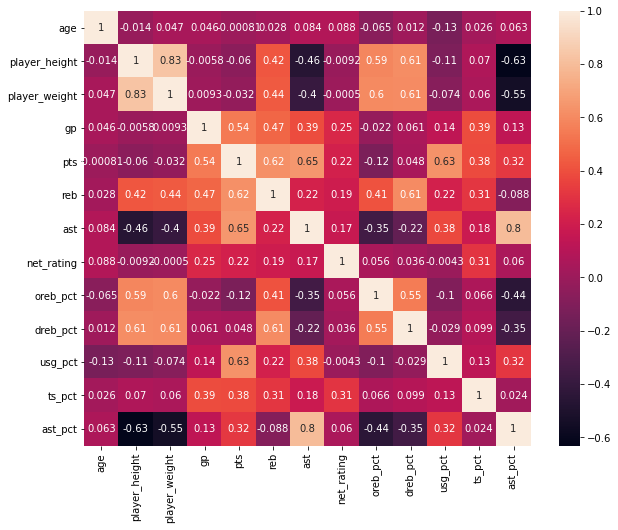

In [9]:
##Creating a correlation matrix for all numeric categories in the dataset

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

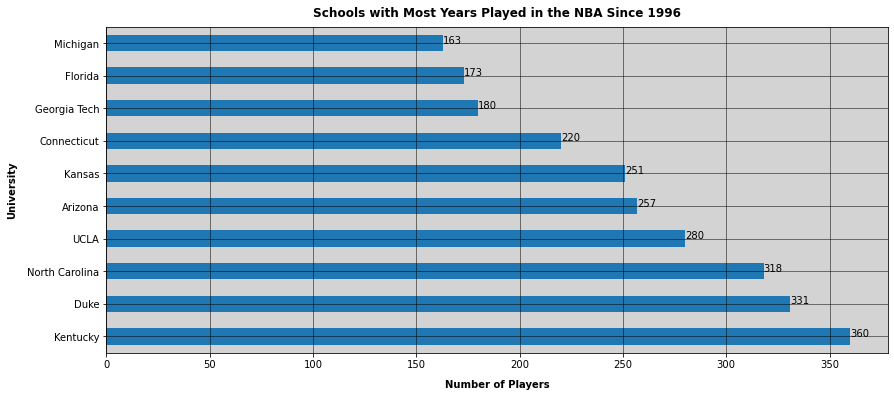

In [10]:
##Most common schools that NBA Players attend
#None was #1: 1,684 (Removed it)

df_college = df[df['college'] != "None"]
top_10 = df_college.college.value_counts().head(10)

fig, ax = plt.subplots(figsize=(14,6))
top_10.plot.barh()
ax.set_title('Schools with Most Years Played in the NBA Since 1996', weight = 'bold', pad = 10)
ax.set_xlabel('Number of Players', labelpad=10, weight = 'bold')
ax.set_ylabel('University', labelpad=10, weight = 'bold')
ax.set_facecolor("lightgray")
ax.grid(color = 'black', linewidth = '.5')

##To get the values on the plot: https://www.kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python
for index, value in enumerate(top_10):
    plt.text(value, index, str(value))

### Finding the highest single season averages of the 3 major categories (Points, Assists, Rebounds)

In [11]:
##Top 10 highest scoring seasons in the dataset

top10_points = df.nlargest(10, ['pts'])
top10_points[['player_name', 'pts', 'season']]

,player_name,pts,season
10219,James Harden,36.1,2018-19
4083,Kobe Bryant,35.4,2005-06
10746,James Harden,34.5,2019-20
4271,Allen Iverson,33.0,2005-06
2953,Tracy McGrady,32.1,2002-03
7972,Kevin Durant,32.0,2013-14
4825,Kobe Bryant,31.6,2006-07
9304,Russell Westbrook,31.6,2016-17
2490,Allen Iverson,31.4,2001-02
4075,LeBron James,31.4,2005-06


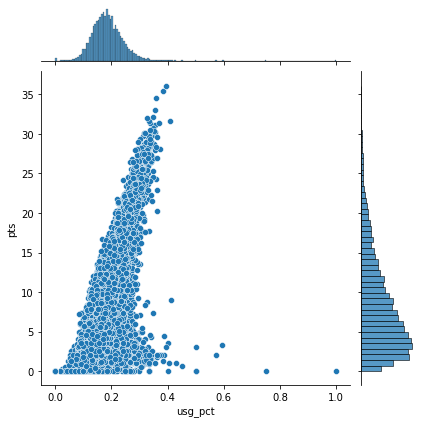

In [44]:
g = sns.jointplot(data = df, x = 'usg_pct', y = 'pts')

In [13]:
##Top 10 highest assists seasons in the dataset

top10_assist = df.nlargest(10, ['ast'])
top10_assist[['player_name', 'ast', 'season']]

,player_name,ast,season
6817,Rajon Rondo,11.7,2011-12
8662,Rajon Rondo,11.7,2015-16
4759,Steve Nash,11.6,2006-07
5056,Chris Paul,11.6,2007-08
3647,Steve Nash,11.5,2004-05
430,Mark Jackson,11.4,1996-97
6555,Steve Nash,11.4,2010-11
6644,Rajon Rondo,11.2,2010-11
9249,James Harden,11.2,2016-17
5232,Steve Nash,11.1,2007-08


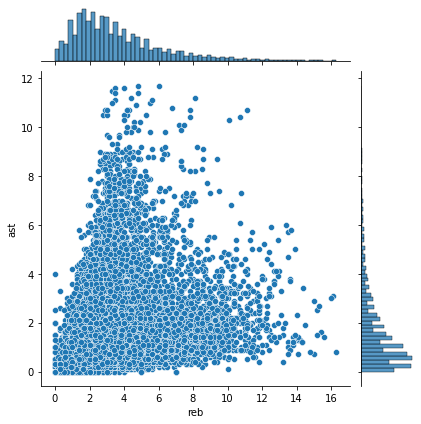

In [14]:
g = sns.jointplot(data = df, x = 'reb', y = 'ast')

In [15]:
##Top 10 rebounding seasons in the dataset

top10_rebound = df.nlargest(10, ['reb'])
top10_rebound[['player_name', 'reb', 'season']]

,player_name,reb,season
1943,Danny Fortson,16.3,2000-01
0,Dennis Rodman,16.1,1996-97
9666,Andre Drummond,16.0,2017-18
10272,Andre Drummond,15.6,2018-19
2735,Ben Wallace,15.4,2002-03
10808,Andre Drummond,15.3,2019-20
6255,Kevin Love,15.2,2010-11
9687,DeAndre Jordan,15.2,2017-18
713,Dennis Rodman,15.0,1997-98
8135,DeAndre Jordan,15.0,2014-15


### Creating clusters for whole dataset

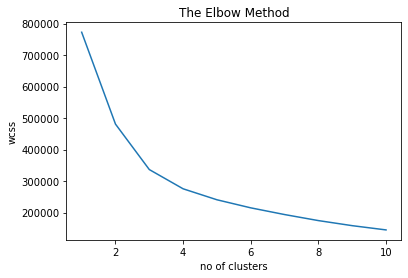

In [25]:
##Conducting Elbow method to determine optimal number of clusters
#At the elbow of the graph, that is where the number of clusters is found

df_19 = df[df['season'] == '2018-19']
##Getting rid of the objects and leaving the float values

X = df_19.drop(['player_name', 'team_abbreviation', 'college', 'country',
                          'draft_year', 'draft_round', 'draft_number', 'season'],axis=1)

##Got code from: https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

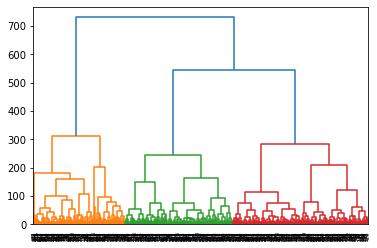

In [35]:
## Created a dendrogram also check if Elbow method was correct
#Code from: https://www.kaggle.com/nafisur/customer-segmentation-analysis-cluster-analysis

import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

In [26]:

##Inspiration for code: https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation
#Creates the clusters for players

from sklearn.cluster import KMeans
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=42)
kmeans = kmeansmodel.fit_predict(X)

##Code inspiration: https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering
#puts clusters back into the orginal dataframe
df_2019 = df_19.reset_index()
clusters = pd.DataFrame(kmeans)
clusters.columns = ['cluster_prediction']
df2019_cluster = pd.concat([df_2019, clusters], axis = 1)

##Creating seperate dataframes for each cluster

cluster_0 = df2019_cluster[df2019_cluster['cluster_prediction'] == 0]
cluster_1 = df2019_cluster[df2019_cluster['cluster_prediction'] == 1]
cluster_2 = df2019_cluster[df2019_cluster['cluster_prediction'] == 2]

### EDA on the clusters

In [27]:
cluster_0.describe()

,index,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,cluster_prediction
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.00000,174.000000,174.0
mean,10343.632184,25.425287,78.317126,212.971264,16.850575,4.452299,2.033908,0.974138,-4.930460,0.041126,0.123977,0.170891,0.47881,0.120322,0.0
std,154.433188,3.789649,3.109784,21.420758,12.318536,3.909536,1.725983,1.103263,18.759523,0.050645,0.082468,0.057958,0.18094,0.101822,0.0
min,10101.000000,19.000000,68.820000,160.000000,1.000000,0.000000,0.000000,0.000000,-95.600000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
25%,10204.250000,23.000000,75.810000,200.000000,6.000000,2.000000,0.900000,0.400000,-10.150000,0.012250,0.079250,0.139250,0.41325,0.051000,0.0
50%,10330.000000,24.000000,78.300000,210.000000,15.000000,3.500000,1.600000,0.800000,-4.900000,0.026000,0.110500,0.166000,0.50100,0.096500,0.0
75%,10465.500000,28.000000,80.790000,225.000000,26.000000,5.300000,2.700000,1.100000,2.300000,0.059000,0.153750,0.199750,0.57100,0.182000,0.0
max,10630.000000,39.000000,84.780000,266.000000,44.000000,20.700000,10.900000,8.700000,66.700000,0.500000,0.571000,0.333000,1.50000,0.667000,0.0


In [28]:
cluster_1.describe()

,index,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,cluster_prediction
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0
mean,10372.925926,26.534392,76.629683,200.359788,67.333333,11.360847,3.424339,2.959259,-0.625397,0.024974,0.106444,0.190878,0.540873,0.169656,1.0
std,143.297618,4.315377,2.470517,13.548089,12.061897,5.859921,1.511354,1.987937,5.856301,0.016466,0.032738,0.052096,0.040166,0.093447,0.0
min,10105.000000,19.000000,71.820000,170.000000,37.000000,1.000000,0.700000,0.300000,-15.200000,0.006000,0.055000,0.101000,0.417000,0.040000,1.0
25%,10256.000000,23.000000,74.810000,190.000000,59.000000,6.900000,2.400000,1.500000,-4.200000,0.015000,0.085000,0.155000,0.516000,0.095000,1.0
50%,10380.000000,26.000000,76.800000,200.000000,70.000000,9.900000,3.100000,2.400000,-0.400000,0.021000,0.102000,0.179000,0.545000,0.146000,1.0
75%,10493.000000,29.000000,78.800000,212.000000,77.000000,14.800000,4.200000,3.900000,3.200000,0.030000,0.122000,0.223000,0.566000,0.241000,1.0
max,10629.000000,42.000000,82.790000,222.000000,82.000000,36.100000,11.100000,10.700000,17.500000,0.126000,0.260000,0.396000,0.645000,0.454000,1.0


In [29]:
cluster_2.describe()

,index,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,cluster_prediction
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0
mean,10379.880240,27.107784,81.600359,241.017964,62.532934,9.840120,5.472455,1.734132,-0.610180,0.063539,0.176377,0.179551,0.573425,0.112695,2.0
std,160.792383,4.367225,2.039608,13.993317,13.758145,5.992275,2.942822,1.445424,6.162495,0.034752,0.052277,0.048671,0.048136,0.060685,0.0
min,10104.000000,19.000000,76.800000,220.000000,28.000000,1.800000,0.900000,0.300000,-22.700000,0.006000,0.059000,0.084000,0.455000,0.040000,2.0
25%,10242.000000,24.000000,79.800000,230.000000,51.000000,5.400000,3.450000,0.800000,-5.050000,0.035000,0.142000,0.147000,0.539000,0.071000,2.0
50%,10383.000000,26.000000,81.790000,240.000000,64.000000,8.000000,4.700000,1.300000,0.000000,0.062000,0.171000,0.173000,0.572000,0.094000,2.0
75%,10532.500000,30.000000,82.790000,250.000000,75.000000,13.550000,7.300000,2.000000,3.650000,0.089000,0.213000,0.209000,0.603500,0.130000,2.0
max,10626.000000,41.000000,86.780000,290.000000,82.000000,27.700000,15.600000,8.300000,12.500000,0.151000,0.315000,0.327000,0.698000,0.376000,2.0


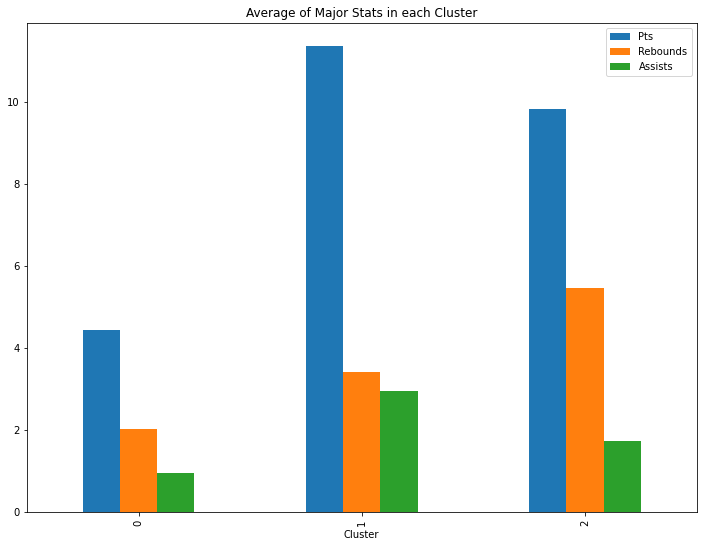

In [34]:
##Inspiration for plot method: https://www.delftstack.com/howto/matplotlib/pandas-plot-multiple-columns-on-bar-chart-matplotlib/

cluster_stats = [[0, round(cluster_0.pts.mean(), 2), round(cluster_0.reb.mean(), 2), round(cluster_0.ast.mean(), 2)],
                 [1, round(cluster_1.pts.mean(),2), round(cluster_1.reb.mean(),2), round(cluster_1.ast.mean(),2)],
                 [2, round(cluster_2.pts.mean(),2), round(cluster_2.reb.mean(),2), round(cluster_2.ast.mean(),2)]]

stats =pd.DataFrame(cluster_stats ,columns=["Cluster","Pts","Rebounds","Assists"])

stats.plot(x="Cluster", y=["Pts", "Rebounds", "Assists"], kind="bar",figsize=(12,9), title = "Average of Major Stats in each Cluster")
plt.show()

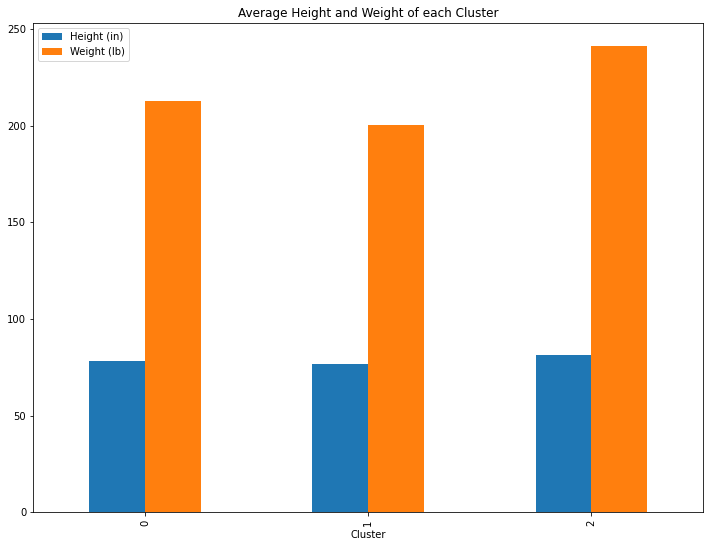

In [33]:
cluster_stats2 = [[0, round(cluster_0.player_height.mean(), 2), round(cluster_0.player_weight.mean(), 2)],
                 [1, round(cluster_1.player_height.mean(),2), round(cluster_1.player_weight.mean(),2)],
                 [2, round(cluster_2.player_height.mean(),2), round(cluster_2.player_weight.mean(),2)]]

stats =pd.DataFrame(cluster_stats2 ,columns=["Cluster","Height (in)","Weight (lb)"])

stats.plot(x="Cluster", y=["Height (in)", "Weight (lb)"], kind="bar",figsize=(12,9), title = "Average Height and Weight of each Cluster")
plt.show()

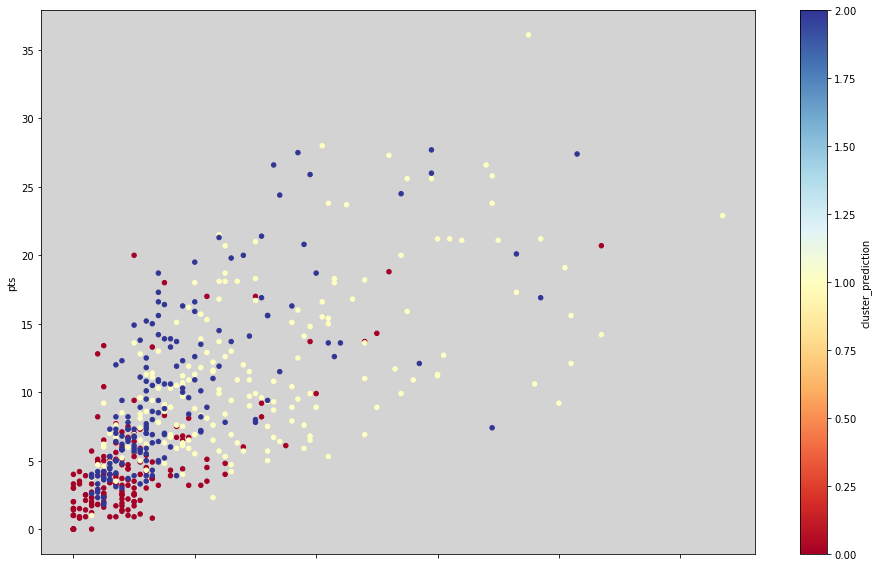

In [32]:
df2019_cluster_full = pd.concat([cluster_0, cluster_1,cluster_2], axis = 0)
ax = df2019_cluster_full.plot.scatter(x = 'ast', y = 'pts', c = 'cluster_prediction', colormap = 'RdYlBu', figsize = (16,10))
ax.set_facecolor("lightgray")

In [39]:
top10_rebound = cluster_0.nlargest(10, ['pts'])
top10_rebound[['player_name', 'pts', 'gp']]

,player_name,pts,gp
89,John Wall,20.7,32
104,JaKarr Sampson,20.0,4
333,Victor Oladipo,18.8,36
286,T.J. Warren,18.0,43
304,RJ Hunter,17.0,1
396,Kevin Love,17.0,22
337,Walt Lemon Jr.,14.3,6
2,Goran Dragic,13.7,36
149,Caris LeVert,13.7,40
150,Carmelo Anthony,13.4,10


In [40]:
top10_rebound = cluster_1.nlargest(10, ['pts'])
top10_rebound[['player_name', 'pts', 'gp']]

,player_name,pts,gp
118,James Harden,36.1,78
299,Paul George,28.0,77
281,Stephen Curry,27.3,69
211,Devin Booker,26.6,64
241,Damian Lillard,25.8,80
134,Bradley Beal,25.6,82
423,Kemba Walker,25.6,82
222,Donovan Mitchell,23.8,77
411,Kyrie Irving,23.8,67
352,Zach LaVine,23.7,63


In [41]:
top10_rebound = cluster_2.nlargest(10, ['pts'])
top10_rebound[['player_name', 'pts', 'gp']]

,player_name,pts,gp
10,Giannis Antetokounmpo,27.7,72
84,Joel Embiid,27.5,64
419,LeBron James,27.4,55
449,Kawhi Leonard,26.6,60
393,Kevin Durant,26.0,78
180,Anthony Davis,25.9,56
160,Blake Griffin,24.5,75
448,Karl-Anthony Towns,24.4,77
439,Julius Randle,21.4,73
412,LaMarcus Aldridge,21.3,81


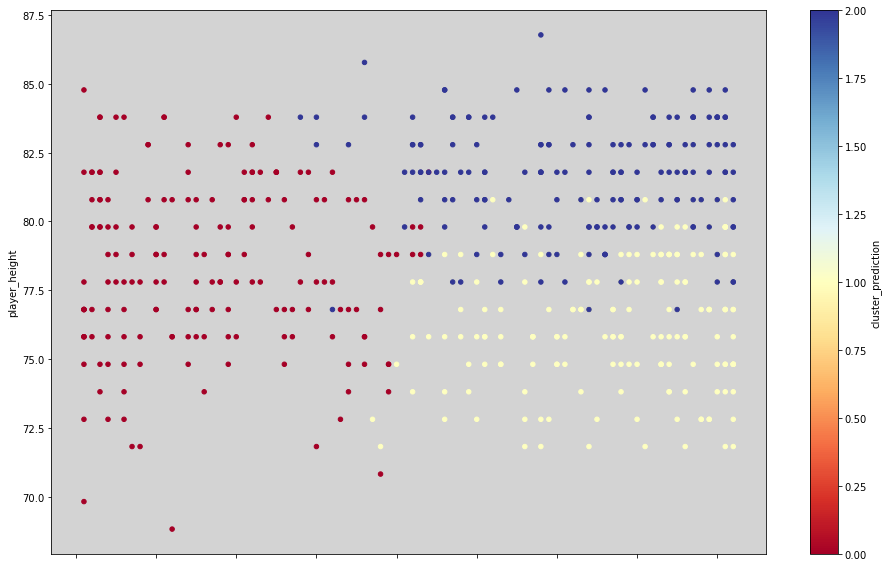

In [43]:
ax = df2019_cluster_full.plot.scatter(x = 'gp', y = 'player_height', c = 'cluster_prediction', colormap = 'RdYlBu', figsize = (16,10))
ax.set_facecolor("lightgray")